In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
traindata = pd.read_csv("Train.csv",na_values=['',' ','NA'])
testdata = pd.read_csv("Test.csv",na_values=['',' ','NA'])
# again = pd.read_csv('again.csv')

In [4]:
traindata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


#### Stats

In [5]:
train_temp = traindata[['StockCode','UnitPrice','Description','CustomerID']]
test_temp = testdata[['StockCode','Description','CustomerID']]

In [6]:
#transform(lambda x: x.fillna(x.mean()))
df = pd.DataFrame(train_temp.groupby(['StockCode'])['UnitPrice'].apply(lambda x: x.mean()))
df['StockCode'] = df.index
df = df.reset_index(drop=True)
df= df[['StockCode','UnitPrice']]

In [7]:
df.head(2)

,StockCode,UnitPrice
0,0,0.850000
1,1,0.422857


In [8]:
a= pd.Series(df.UnitPrice.values,index=df.StockCode).to_dict()
test_temp['UnitPrice'] = test_temp['StockCode'].map(a)

<ipython-input-8-752d4ee9737c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_temp['UnitPrice'] = test_temp['StockCode'].map(a)


In [9]:
test_temp.head(3)

,StockCode,Description,CustomerID,UnitPrice
0,1709,1079,16161.0,1.650000
1,510,3457,17341.0,1.193421
2,604,694,15158.0,3.867050


In [10]:
test_temp['Index'] = test_temp.index

<ipython-input-10-4c9a6c0576e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_temp['Index'] = test_temp.index


In [11]:
#test_temp.loc[test_temp.StockCode == 3680]

In [12]:
print(test_temp.isnull().sum())

StockCode       0
Description     0
CustomerID      0
UnitPrice      91
Index           0
dtype: int64


In [13]:
null_df = test_temp[test_temp.isna().any(axis=1)]
null_df.shape

(91, 5)

In [14]:
#transform(lambda x: x.fillna(x.mean()))
df1 = pd.DataFrame(train_temp.groupby(['Description'])['UnitPrice'].apply(lambda x: x.mean()))
df1['Description'] = df1.index
df1 = df1.reset_index(drop=True)
df1= df1[['Description','UnitPrice']]

In [15]:
df1.shape

(3819, 2)

In [16]:
test_temp.index

RangeIndex(start=0, stop=122049, step=1)

In [18]:
# a= pd.Series(again.UnitPrice.values,index=again.index).to_dict()
# test_temp['UnitPrice'] = test_temp.UnitPrice.fillna(test_temp['Index'].map(a))

In [19]:
#transform(lambda x: x.fillna(x.mean()))
df2 = pd.DataFrame(train_temp.groupby(['CustomerID'])['UnitPrice'].apply(lambda x: x.mean()))
df2['CustomerID'] = df2.index
df2 = df2.reset_index(drop=True)
df2= df2[['CustomerID','UnitPrice']]

In [20]:
df2.shape

(4339, 2)

In [21]:
a= pd.Series(df2.UnitPrice.values,index=df2.CustomerID).to_dict()
test_temp['UnitPrice'] = test_temp.UnitPrice.fillna(test_temp['CustomerID'].map(a))

<ipython-input-21-d4f34ac7a8cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_temp['UnitPrice'] = test_temp.UnitPrice.fillna(test_temp['CustomerID'].map(a))


In [22]:
test_temp.head()

,StockCode,Description,CustomerID,UnitPrice,Index
0,1709,1079,16161.0,1.650000,0
1,510,3457,17341.0,1.193421,1
2,604,694,15158.0,3.867050,2
3,1478,3473,16033.0,1.641111,3
4,3216,871,15351.0,12.610985,4


In [23]:
#test_temp.fillna(16, inplace=True)
test_temp = test_temp[['UnitPrice']]
test_temp.to_csv('withagain.csv', index=False)

In [24]:
#a= pd.Series(pred1.UnitPrice.values,index=pred1.StockCode).to_dict()
#test_temp['UnitPrice'] = test_temp.UnitPrice.fillna(test_temp['StockCode'].map(a))

#### EDA

In [25]:
traindata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [26]:
testdata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [27]:
#import pandas_profiling as pp
#pp.ProfileReport(traindata)

In [28]:
print(traindata.shape)
print(testdata.shape)

(284780, 8)
(122049, 7)


In [29]:
traindata.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [30]:
testdata.describe()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
count,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000,122049.000000
mean,9940.419692,1572.955788,2026.412744,12.137920,15286.445256,32.836795
std,5554.116349,845.106082,1087.697388,54.311646,1711.887591,6.726816
min,0.000000,0.000000,0.000000,-9360.000000,12347.000000,0.000000
25%,5018.000000,937.000000,1147.000000,2.000000,13953.000000,35.000000
50%,10311.000000,1523.000000,1987.000000,5.000000,15152.000000,35.000000
75%,14635.000000,2106.000000,2945.000000,12.000000,16782.000000,35.000000
max,22189.000000,3683.000000,3895.000000,4800.000000,18287.000000,36.000000


In [31]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(traindata)

,Data Type,No of Levels,Levels
InvoiceNo,int64,20971,[ 6141 6349 16783 ... 21879 13119 20867]
StockCode,int64,3619,[1583 1300 2178 ... 3407 1027 3521]
Description,int64,3819,[ 144 3682 1939 ... 1720 3539 2303]
Quantity,int64,373,[ 3 6 4 1 12 5 ...
InvoiceDate,object,19451,['2011-05-06 16:54:00' '2011-05-11 07:35:00' '...
UnitPrice,float64,524,[3.75000e+00 1.95000e+00 5.95000e+00 8.30000e-...
CustomerID,float64,4339,[14056. 13098. 15044. ... 15619. 17291. 13747.]
Country,int64,37,[35 23 13 0 10 14 24 3 26 25 6 30 16 18 15 ...


In [32]:
inspect_data(testdata)

,Data Type,No of Levels,Levels
InvoiceNo,int64,18204,[ 3139 617 14653 ... 3470 19694 17095]
StockCode,int64,3410,[1709 510 604 ... 3013 3115 3381]
Description,int64,3563,[1079 3457 694 ... 3721 2072 3184]
Quantity,int64,274,[ 3 1 36 2 48 18 7 ...
InvoiceDate,object,17029,['2011-02-22 15:22:00' '2010-12-08 12:46:00' '...
CustomerID,float64,4226,[16161. 17341. 15158. ... 12977. 16679. 16262.]
Country,int64,37,[35 24 10 3 13 32 26 14 7 31 6 30 23 12 17 ...


In [33]:
print(traindata.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [34]:
print(testdata.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
CustomerID     0
Country        0
dtype: int64


In [35]:
print((traindata == 0).sum())

InvoiceNo        6
StockCode       32
Description     28
Quantity         0
InvoiceDate      0
UnitPrice       34
CustomerID       0
Country        883
dtype: int64


In [36]:
print((testdata == 0).sum())

InvoiceNo        1
StockCode       17
Description     11
Quantity         0
InvoiceDate      0
CustomerID       0
Country        376
dtype: int64


#### unit price 0

In [37]:
## they could either be RETURNED ITEMS or FREE ITEMS
traindata.loc[(traindata['UnitPrice'] == 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15291,15305,3681,2140,1,2011-11-03 13:24:00,0.0,12437.0,13
26477,17360,3034,248,12540,2011-11-25 15:57:00,0.0,13256.0,35
35916,10019,1805,1738,11,2011-07-28 17:09:00,0.0,12507.0,30
47866,16621,1330,1585,4,2011-11-17 19:52:00,0.0,15602.0,35
57601,13438,1631,1434,2,2011-10-06 08:17:00,0.0,15804.0,35
63583,15625,1746,695,1,2011-11-07 16:34:00,0.0,13985.0,35
71639,1356,1292,2780,10,2010-12-21 13:45:00,0.0,14911.0,10
95323,15881,992,2320,24,2011-11-10 11:49:00,0.0,13081.0,35
112680,16689,2220,3006,2,2011-11-18 13:23:00,0.0,12444.0,24
120752,10575,1992,3082,240,2011-08-11 11:42:00,0.0,14911.0,10


In [38]:
#testdata.loc[testdata.StockCode == 3681]

In [39]:
#traindata.loc[traindata.StockCode == 3681]

In [40]:
#traindata.loc[traindata.UnitPrice >= 1000]

#### plots

C:\Users\Tejasvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Tejasvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes

cannot convert float infinity to integer


C:\Users\Tejasvi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


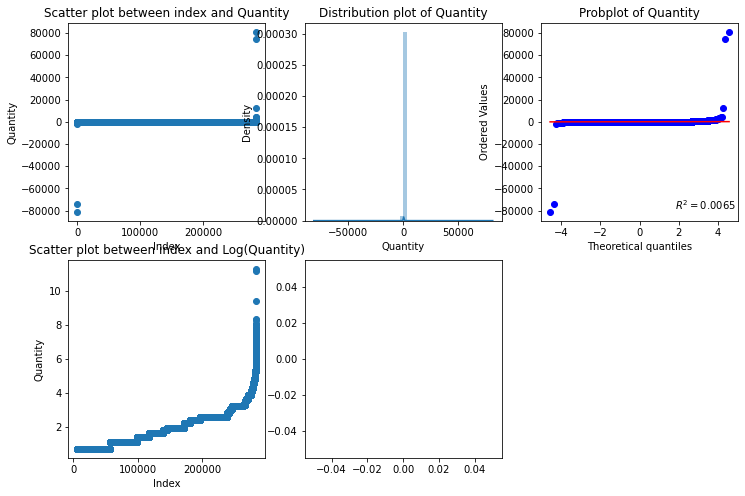

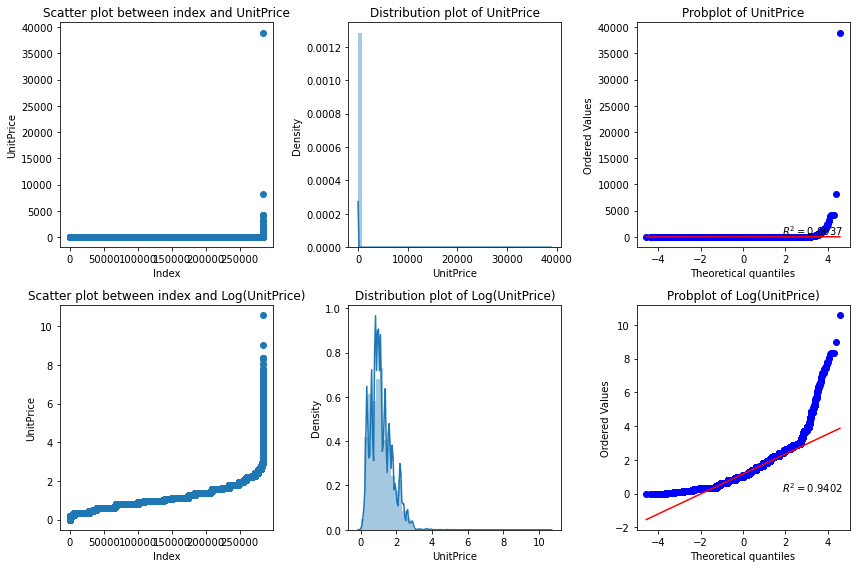

C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


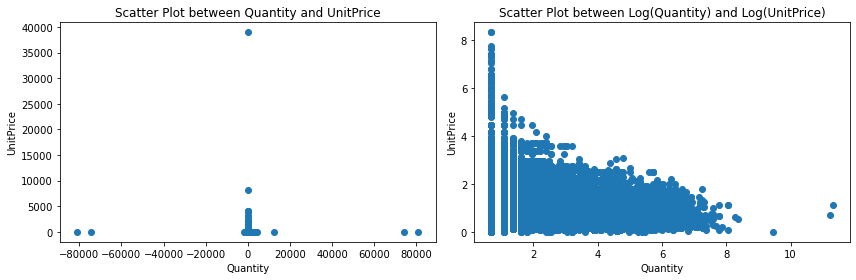

In [41]:
### Let's plot the graph for Quantity and UnitPrice and its scatter plot also.
import scipy.stats as st

### Here, I'm going to plot 
### 1. Scatter plot between index and variables.
### 2. Distribution plot
### 3. Proba plot (used to find the R-Squared values)
### 4. Scatter plot between Quantity and UnitPrice
### Repeat Distribution and Proba plot by transforming the variables in log form

for col in ['Quantity', 'UnitPrice']:
    plt.figure(figsize= (12, 8))
    
    try:
        plt.subplot(2,3,1)
        plt.scatter(traindata.index, traindata[col].sort_values())
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.title(f'Scatter plot between index and {col}')

        plt.subplot(2,3,2)
        sns.distplot(traindata[col])
        plt.title(f'Distribution plot of {col}')

        plt.subplot(2,3,3)
        st.probplot(traindata[col], plot= plt, rvalue= True)
        plt.title(f'Probplot of {col}')

        plt.subplot(2,3,4)
        plt.scatter(traindata.index, np.log(traindata[col].sort_values()+1))
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.title(f'Scatter plot between index and Log({col})')

        
        plt.subplot(2,3,5)
        sns.distplot(np.log(traindata[col]+1))
        plt.title(f'Distribution plot of Log({col})')

        plt.subplot(2,3,6)
        st.probplot(np.log(traindata[col]+1), plot= plt, rvalue= True)
        plt.title(f'Probplot of Log({col})')

    except Exception as e:
        print(e)
plt.tight_layout()
plt.show()

### Scatter plots
plt.figure(figsize= (12, 4))
plt.subplot(1,2,1)
plt.scatter(traindata['Quantity'], traindata['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot between Quantity and UnitPrice')

plt.subplot(1,2,2)
plt.scatter(np.log(traindata['Quantity']+1), np.log(traindata['UnitPrice']+1))
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot between Log(Quantity) and Log(UnitPrice)')

plt.tight_layout()
plt.show()

#### Relationship between stockcode and description

In [42]:
#traindata.loc[(traindata['StockCode'] == 432)]

In [43]:
#df = pd.DataFrame(traindata.groupby('StockCode').apply(lambda x: x['Description'].unique()))
df1= traindata.groupby(['StockCode','Description']).count()

#### Data types

In [44]:
from datetime import datetime
traindata['InvoiceDate'] = pd.to_datetime(traindata['InvoiceDate'])
testdata['InvoiceDate'] = pd.to_datetime(testdata['InvoiceDate'])

In [45]:
cat = ['Country','CustomerID','StockCode']

In [46]:
traindata[cat] = traindata[cat].astype('category')
traindata['Quantity'] = traindata['Quantity'].astype(np.int32) # change it to int16 from int64 to save memory
traindata['UnitPrice'] = traindata['UnitPrice'].astype(np.float32) 
#traindata[['CustomerID','StockCode']] = traindata[['CustomerID','StockCode']].astype(np.int32) 

In [47]:
testdata[cat] = testdata[cat].astype('category')
testdata['Quantity'] = testdata['Quantity'].astype(np.int16) 
#testdata[['CustomerID','StockCode']] = testdata[['CustomerID','StockCode']].astype(np.int32) 

In [48]:
traindata.shape

(284780, 8)

In [49]:
inspect_data(traindata)

C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


,Data Type,No of Levels,Levels
InvoiceNo,int64,20971,[ 6141 6349 16783 ... 21879 13119 20867]
StockCode,category,3619,"[1583, 1300, 2178, 2115, 1210, ..., 2899, 3427..."
Description,int64,3819,[ 144 3682 1939 ... 1720 3539 2303]
Quantity,int32,373,[ 3 6 4 1 12 5 ...
InvoiceDate,datetime64[ns],19451,['2011-05-06T16:54:00.000000000' '2011-05-11T0...
UnitPrice,float32,524,[3.75000e+00 1.95000e+00 5.95000e+00 8.30000e-...
CustomerID,category,4339,"[14056.0, 13098.0, 15044.0, 15525.0, 13952.0, ..."
Country,category,37,"[35, 23, 13, 0, 10, ..., 4, 27, 20, 2, 28]\nLe..."


### handing date time

In [50]:
#traindata.loc[(traindata['CustomerID']==14646) & (traindata['StockCode']== 442)]

In [51]:
#traindata.loc[(traindata['Invoice_year']==2010) & (traindata['StockCode']== 2098)]

In [52]:
traindata['Invoice_month'] = traindata['InvoiceDate'].map(lambda x: x.month)
testdata['Invoice_month'] = testdata['InvoiceDate'].map(lambda x: x.month)

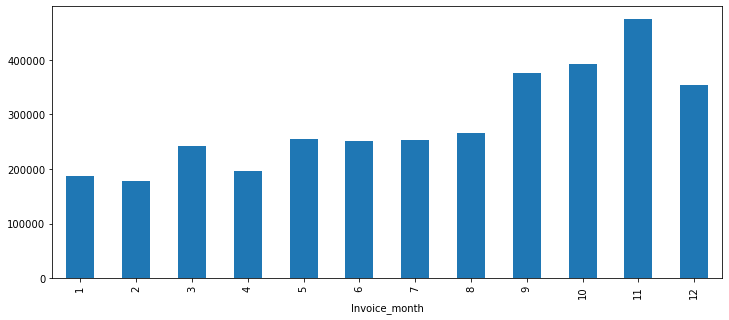

In [53]:
traindata.groupby(['Invoice_month'])['Quantity'].sum().plot(kind= 'bar', figsize= (12, 5))
plt.show()

In [54]:
#df=traindata.groupby(['StockCode','Invoice_month','UnitPrice']).count().reset_index()
#df.head(3)

Text(0.5, 0, 'Invoice_month')

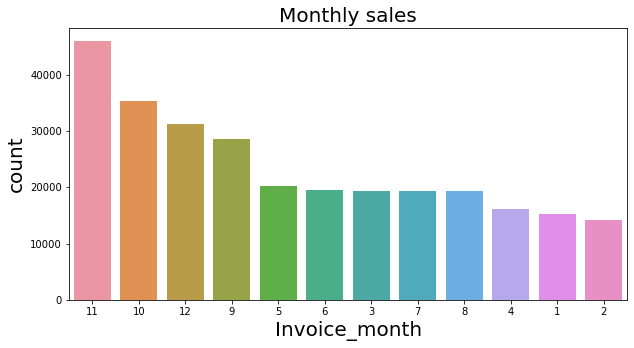

In [55]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.countplot(x = traindata.Invoice_month, \
              order = traindata.Invoice_month.value_counts().iloc[:].index, \
                                                      orient = 'v')
plt.title('Monthly sales', fontsize=20 )
plt.ylabel('count', fontsize = 20)
plt.xlabel('Invoice_month', fontsize = 20)

In [56]:
traindata['Day_of_Week'] = traindata['InvoiceDate'].map(lambda x: x.dayofweek)
testdata['Day_of_Week'] = testdata['InvoiceDate'].map(lambda x: x.dayofweek)
#ALL['Day_of_Week']= ALL['InvoiceDate'].dt.dayofweek


In [57]:
traindata['Invoice_hour'] = traindata['InvoiceDate'].map(lambda x: x.hour)
testdata['Invoice_hour'] = testdata['InvoiceDate'].map(lambda x: x.hour)

In [58]:
traindata[['Day_of_Week','Invoice_month','Invoice_hour']] = traindata[['Day_of_Week','Invoice_month','Invoice_hour']].astype('category')
testdata[['Day_of_Week','Invoice_month', 'Invoice_hour']] = testdata[['Day_of_Week','Invoice_month','Invoice_hour']].astype('category')

In [59]:
traindata.drop('InvoiceDate',axis=1,inplace=True)
testdata.drop('InvoiceDate',axis=1,inplace=True)

In [60]:
traindata.dtypes

InvoiceNo           int64
StockCode        category
Description         int64
Quantity            int32
UnitPrice         float32
CustomerID       category
Country          category
Invoice_month    category
Day_of_Week      category
Invoice_hour     category
dtype: object

In [61]:
traindata.memory_usage()

Index                128
InvoiceNo        2278240
StockCode         730648
Description      2278240
Quantity         1139120
UnitPrice        1139120
CustomerID        736408
Country           286148
Invoice_month     285176
Day_of_Week       285000
Invoice_hour      285456
dtype: int64

In [62]:
traindata.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_month,Day_of_Week,Invoice_hour
0,6141,1583,144,3,3.75,14056.0,35,5,4,16
1,6349,1300,3682,6,1.95,13098.0,35,5,2,7
2,16783,2178,1939,4,5.95,15044.0,35,11,6,13
3,16971,2115,2983,1,0.83,15525.0,35,11,1,12
4,6080,1210,2886,12,1.65,13952.0,35,5,4,9


In [63]:
### Ever Maximum and Ever Average Quantity by Country, CustomerID, StockCode, Description
for col in ['CustomerID', 'Description']:
    temp= traindata.groupby(col)['Quantity'].agg(['max', 'mean']).reset_index()
    temp.columns= [col, f'Max_Quantity_{col}', f'Avg_Quantity_{col}']
    traindata = pd.merge(traindata, temp, on= col, how= 'left')
    del temp

In [64]:
for col in ['CustomerID', 'Description']:
    temp= testdata.groupby(col)['Quantity'].agg(['max', 'mean']).reset_index()
    temp.columns= [col, f'Max_Quantity_{col}', f'Avg_Quantity_{col}']
    testdata = pd.merge(testdata, temp, on= col, how= 'left')
    del temp

In [65]:
traindata.shape

(284780, 14)

In [66]:
testdata.shape

(122049, 13)

In [67]:
print(testdata.isnull().sum())

InvoiceNo                   0
StockCode                   0
Description                 0
Quantity                    0
CustomerID                  0
Country                     0
Invoice_month               0
Day_of_Week                 0
Invoice_hour                0
Max_Quantity_CustomerID     0
Avg_Quantity_CustomerID     0
Max_Quantity_Description    0
Avg_Quantity_Description    0
dtype: int64


#### Duplicates

In [68]:
dupes=traindata.duplicated()
sum(dupes)

#bill_data_uniq=bill_data.drop_duplicates()

2622

In [69]:
dupes=testdata.duplicated()
sum(dupes)

508

In [70]:
duplicate = traindata[traindata.duplicated()] 
duplicate.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_month,Day_of_Week,Invoice_hour,Max_Quantity_CustomerID,Avg_Quantity_CustomerID,Max_Quantity_Description,Avg_Quantity_Description
10046,17505,2388,3587,1,2.08,13030.0,35,11,0,14,24,4.223881,1500,18.562500
10509,15113,2175,100,5,0.83,17377.0,35,11,1,10,36,4.907591,216,14.718919
10652,3421,2546,216,3,0.21,15456.0,35,3,1,13,144,12.302326,48,10.714286
11965,11965,3108,195,6,1.25,13611.0,35,9,6,14,48,8.949153,360,26.292453
13108,14321,2091,3029,1,1.25,14704.0,35,10,2,13,28,2.582492,36,6.037433


#### Quantity

In [71]:
# negative quantity values
print(traindata['Quantity'].lt(0).sum())
print(testdata['Quantity'].lt(0).sum())

6167
2738


In [72]:
#traindata[['Quantity', 'UnitPrice']].loc[(traindata['Quantity'] < 0)].count()

In [74]:
# df_train['Quantity']=abs(df_train['Quantity'])

In [75]:
# converting quantity into positives
traindata["Quantity"] = np.where(traindata["Quantity"]<0,traindata["Quantity"]*-1,traindata["Quantity"])
testdata["Quantity"] = np.where(testdata["Quantity"]<0,testdata["Quantity"]*-1,testdata["Quantity"])

In [76]:
traindata.describe()

,InvoiceNo,Description,Quantity,UnitPrice,Max_Quantity_CustomerID,Avg_Quantity_CustomerID,Max_Quantity_Description,Avg_Quantity_Description
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,2023.955573,13.645885,3.449193,131.739813,12.028468,294.090157,12.028468
std,5551.519138,1089.812078,295.041223,78.382553,426.679586,34.961218,1702.977641,12.860865
min,0.000000,0.000000,1.000000,0.000000,-1350.000000,-1350.000000,-24.000000,-24.000000
25%,5069.000000,1141.000000,2.000000,1.250000,25.000000,3.863874,50.000000,5.988550
50%,10310.000000,1987.000000,5.000000,1.950000,48.000000,8.000000,144.000000,9.655172
75%,14657.000000,2945.000000,12.000000,3.750000,100.000000,12.456790,288.000000,14.702703
max,22188.000000,3895.000000,80995.000000,38970.000000,80995.000000,12540.000000,80995.000000,1300.000000


In [77]:
traindata.loc[(traindata['Quantity'] >= 900)]
#hackathon_train.shape

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_month,Day_of_Week,Invoice_hour,Max_Quantity_CustomerID,Avg_Quantity_CustomerID,Max_Quantity_Description,Avg_Quantity_Description
1145,1309,425,2279,960,0.40,13027.0,35,12,0,12,1200,705.000000,1200,30.636483
1591,3554,1309,275,1200,0.36,16333.0,35,3,4,12,2592,705.666667,1200,50.690000
1862,10105,2906,1407,1440,0.17,13316.0,35,7,6,11,1440,96.174603,1440,547.764706
1950,5794,2812,3805,1152,0.21,16333.0,35,4,2,15,2592,705.666667,2592,99.209366
5758,2752,1547,1537,2400,0.94,16029.0,35,2,4,11,2400,115.021622,2400,72.022222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275905,10344,1092,2612,1900,0.72,12931.0,35,8,3,18,1900,189.073529,1992,45.737271
279013,4617,2906,1407,1440,0.17,13316.0,35,3,2,13,1440,96.174603,1440,547.764706
279948,11434,2906,1407,1440,0.17,13069.0,35,9,3,11,1440,12.742236,1440,547.764706
284132,5557,425,2279,960,0.40,13027.0,35,4,2,9,1200,705.000000,1200,30.636483


In [78]:
testdata.loc[(testdata['Quantity'] >= 900)].count()


InvoiceNo                   49
StockCode                   49
Description                 49
Quantity                    49
CustomerID                  49
Country                     49
Invoice_month               49
Day_of_Week                 49
Invoice_hour                49
Max_Quantity_CustomerID     49
Avg_Quantity_CustomerID     49
Max_Quantity_Description    49
Avg_Quantity_Description    49
dtype: int64

In [79]:
traindata['Quantity'] = traindata['Quantity'].astype(np.float32) # change it to int16 from int64 to save memory
testdata['Quantity'] = testdata['Quantity'].astype(np.float32) # change it to int16 from int64 to save memory

In [80]:
# unit prize zero when quantity is not
traindata[['Quantity', 'UnitPrice']].loc[(traindata['UnitPrice'] == 0)].head()

,Quantity,UnitPrice
15291,1.0,0.0
26477,12540.0,0.0
35916,11.0,0.0
47866,4.0,0.0
57601,2.0,0.0


### Outliers

In [81]:
import numpy as np 
from scipy import stats 
#traindata_zscores = stats.zscore(traindata[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country']])

In [82]:
#threshold = 3
#print(np.where(traindata_zscores > 3))

In [83]:
traindata['Quantity_zscore'] = stats.zscore(traindata['Quantity'])

In [84]:
traindata.loc[(traindata['Quantity_zscore']>=3) | (traindata['Quantity_zscore']<= -3)]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_month,Day_of_Week,Invoice_hour,Max_Quantity_CustomerID,Avg_Quantity_CustomerID,Max_Quantity_Description,Avg_Quantity_Description,Quantity_zscore
1145,1309,425,2279,960.0,0.40,13027.0,35,12,0,12,1200,705.000000,1200,30.636483,3.207538
1591,3554,1309,275,1200.0,0.36,16333.0,35,3,4,12,2592,705.666667,1200,50.690000,4.020985
1862,10105,2906,1407,1440.0,0.17,13316.0,35,7,6,11,1440,96.174603,1440,547.764706,4.834432
1950,5794,2812,3805,1152.0,0.21,16333.0,35,4,2,15,2592,705.666667,2592,99.209366,3.858295
5758,2752,1547,1537,2400.0,0.94,16029.0,35,2,4,11,2400,115.021622,2400,72.022222,8.088221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275905,10344,1092,2612,1900.0,0.72,12931.0,35,8,3,18,1900,189.073529,1992,45.737271,6.393539
279013,4617,2906,1407,1440.0,0.17,13316.0,35,3,2,13,1440,96.174603,1440,547.764706,4.834432
279948,11434,2906,1407,1440.0,0.17,13069.0,35,9,3,11,1440,12.742236,1440,547.764706,4.834432
284132,5557,425,2279,960.0,0.40,13027.0,35,4,2,9,1200,705.000000,1200,30.636483,3.207538


In [85]:
# df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]
testdata['Quantity_zscore'] = stats.zscore(testdata['Quantity'])
testdata.loc[(testdata['Quantity_zscore']>=3) | (testdata['Quantity_zscore']<= -3)]

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,Invoice_month,Day_of_Week,Invoice_hour,Max_Quantity_CustomerID,Avg_Quantity_CustomerID,Max_Quantity_Description,Avg_Quantity_Description,Quantity_zscore
110,6461,1354,2255,432.0,17404.0,31,5,3,12,768,169.621212,432,36.805556,7.741179
409,14641,968,758,1200.0,13685.0,35,10,1,13,1200,269.909091,1200,50.192308,21.925764
434,12524,2037,1779,200.0,14887.0,35,9,2,15,200,200.000000,200,15.593750,3.456252
478,13361,47,3847,400.0,16684.0,35,10,2,10,600,182.860465,400,37.837838,7.150155
549,6512,2637,3317,600.0,13953.0,35,5,4,9,600,242.000000,600,96.230769,10.844057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121341,14124,2186,2943,384.0,17404.0,31,10,0,10,768,169.621212,384,15.473684,6.854642
121644,5735,638,658,408.0,17857.0,35,4,1,16,800,289.333333,408,33.714286,7.297911
121737,17522,1804,3825,250.0,12657.0,13,11,0,15,250,5.714286,250,27.906977,4.379727
121967,13794,1429,1205,240.0,16029.0,35,10,1,11,1296,122.123596,240,11.752475,4.195032


In [86]:
traindata.dtypes

InvoiceNo                      int64
StockCode                   category
Description                    int64
Quantity                     float32
UnitPrice                    float32
CustomerID                  category
Country                     category
Invoice_month               category
Day_of_Week                 category
Invoice_hour                category
Max_Quantity_CustomerID        int32
Avg_Quantity_CustomerID      float64
Max_Quantity_Description       int32
Avg_Quantity_Description     float64
Quantity_zscore              float32
dtype: object

In [87]:
#traindata.drop('Quantity_zscore',axis=1,inplace=True)
#testdata.drop('Quantity_zscore',axis=1,inplace=True)

In [88]:
traindata[['Country','Invoice_month','Invoice_hour','Day_of_Week']] = traindata[['Country','Invoice_month','Invoice_hour','Day_of_Week']].astype('category')
testdata[['Country','Invoice_month','Invoice_hour','Day_of_Week']] = testdata[['Country','Invoice_month','Invoice_hour','Day_of_Week']].astype('category')


In [89]:
traindata.drop(['InvoiceNo'],axis=1,inplace=True)
testdata.drop(['InvoiceNo'],axis=1,inplace=True)

In [91]:
# traindata.drop(['InvoiceDate'],axis=1,inplace=True)
# testdata.drop(['InvoiceDate'],axis=1,inplace=True)

### Decoupling

In [92]:
y = traindata['UnitPrice']
print(y.shape)
X = traindata[traindata.columns.difference(['UnitPrice'])]  ## Select all columns except "Amount"
print(X.shape)

(284780,)
(284780, 13)


In [93]:
num_attribute = X.select_dtypes(include='number').columns.tolist()
num_attribute

['Avg_Quantity_CustomerID',
 'Avg_Quantity_Description',
 'Description',
 'Max_Quantity_CustomerID',
 'Max_Quantity_Description',
 'Quantity',
 'Quantity_zscore']

In [94]:
## Standardization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X[num_attribute])
X[num_attribute] = standardizer.transform(X[num_attribute])

<ipython-input-94-1d6ca7ab9992>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_attribute] = standardizer.transform(X[num_attribute])
C:\Users\Tejasvi\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [95]:
testdata[num_attribute] =standardizer.transform(testdata[num_attribute])

### Dummification

In [96]:
#pd.get_dummies(df, prefix=['A', 'D'], columns=['A', 'D'])

X= pd.get_dummies(X, drop_first = True)
X.shape

(284780, 8029)

In [97]:
X.head()

,Avg_Quantity_CustomerID,Avg_Quantity_Description,Description,Max_Quantity_CustomerID,Max_Quantity_Description,Quantity,Quantity_zscore,Country_1,Country_2,Country_3,...,StockCode_3674,StockCode_3675,StockCode_3676,StockCode_3677,StockCode_3678,StockCode_3679,StockCode_3680,StockCode_3681,StockCode_3682,StockCode_3683
0,-0.236655,-0.505627,-1.725030,-0.238446,-0.025890,-0.036083,-0.036083,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.379013,-0.397804,1.521407,0.253728,-0.116320,-0.025915,-0.025915,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.177558,-0.583539,-0.077954,-0.191572,-0.144506,-0.032693,-0.032693,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.271874,0.241009,0.880011,-0.252508,-0.022367,-0.042861,-0.042861,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.030321,-0.184325,0.791004,-0.196260,-0.088134,-0.005578,-0.005578,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
testdata = pd.get_dummies(testdata, drop_first = True)
testdata.shape

(122049, 7707)

In [99]:
## Split the data into X_train, X_valid, y_train, y_valid with test_size = 0.20 using sklearn
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30,random_state=1234)

## modelling

### Liner Regression

In [100]:
from sklearn.metrics import mean_squared_error
import math

In [102]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

In [ ]:
#print('Coefficients: \n', model_1.coef_)
#coefficients = pd.DataFrame({'name':list(X_train),'value':model_1.coef_})
#coefficients

In [ ]:
y_pred = model_1.predict(X_train)

mse = mean_squared_error(y_train, y_pred)

rmse = math.sqrt(mse)

In [ ]:
rmse

In [ ]:
valid_pred = model_1.predict(X_valid)

mse = mean_squared_error(y_valid, valid_pred)
rmse = math.sqrt(mse)
rmse

In [69]:
valid_pred

array([2.757434  , 0.27847642, 6.59052577, ..., 0.18499347, 7.36567533,
       5.55573574])

In [1]:
# import lightgbm as lgbm

In [ ]:
def run_LGBM(train, target):
    
    X_train, X_valid, y_train, y_valid= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    #X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.30,random_state=1234)
    param= {}
    param['learning_rate']= 0.01
    param['objective']= 'regression'
    param['metric']= 'rmse'
    #param['boosting']= 'dart'
    param['num_leaves']= 32
    #param['tree_learner']= 'voting'
    param['num_threads']= 7
    param['max_depth']= 6
    param['bagging_fraction']= 0.8
    param['feature_fraction']= 0.8
    param['seed']= 2019
    
    #X_train, X_test, y_train, y_test= train_test_split(train, target, test_size= 0.25, random_state= 2019)
    
    dtrain= lgbm.Dataset(X_train, y_train)
    dtest= lgbm.Dataset(X_valid, y_valid)
    
    model= lgbm.train(param, dtrain, num_boost_round= 10000, valid_sets= (dtrain, dtest), valid_names= ('train', 'valid'), 
                      verbose_eval= 100, early_stopping_rounds= 50)
    
    prediction= model.predict(X_valid)
    
    print('Checking Metrics...')
    print('r2_squared Error: {:.4f}' .format(r2_score(y_valid, prediction)))
    print('MSE: {:.4f}' .format(mean_squared_error(y_valid, prediction)))
    print('RMSE: {:.4f}' .format(np.sqrt(mean_squared_error(y_valid, prediction))))
    
    return model

In [ ]:
model_lgbm= run_LGBM(X, y)

In [ ]:
#### ANN

In [103]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [104]:
from tensorflow import keras

In [105]:
from keras.models import Sequential 
from keras.layers import Dense

In [ ]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)
print('y_train shape: {}'.format(y_train.shape))

In [ ]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [ ]:
model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer='random_uniform', 
                input_dim = 74, activation='relu')) # Add a dense layer 
model.add(Dense(1, kernel_initializer='uniform', 
                activation='relu')) # Add output layer

In [ ]:
from keras.optimizers import Adam, SGD
#from keras.callbacks import EarlyStopping

adam = Adam(lr=0.0001)
sgd = SGD(lr=0.0011, decay=1e-6, momentum=0.9, nesterov=True)
#callbacks
#earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.compile(loss='mean_squared_error', # CrossEntropy is the loss function. 
              optimizer=adam, metrics=[RootMeanSquaredError()])            # Mention the optimizer
                                # Mention the metric to be printed while training

In [ ]:
nb_epochs = 100
# training the MLP model
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=64, class_weight=class_weight) 

In [82]:
from sklearn.ensemble import RandomForestRegressor


In [83]:
rfr_10 = RandomForestRegressor()


In [84]:
rfr_10.fit(X_train,y_train)


RandomForestRegressor()

In [106]:
# Model initilization
# Model training
# Model predictions
rfr10_train_pred = rfr_10.predict(X_train)
rfr10_test_pred = rfr_10.predict(X_valid)

In [98]:
mse = mean_squared_error(y_train, rfr10_train_pred)
rmse = math.sqrt(mse)
rmse

24.912127860806553

In [99]:
mse = mean_squared_error(y_valid, rfr10_test_pred)
rmse = math.sqrt(mse)
rmse

43.29622438029096

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rfc_grid = RandomForestRegressor(n_jobs=-1, max_features='sqrt')
param_grid = param_grid = {"n_estimators" : [10, 25, 50, 75, 100], 'max_leaf_nodes': np.arange(5,30,2),
             'min_samples_split': np.arange(2,10,1),
             'max_depth':np.arange(5,20,2),
             'min_weight_fraction_leaf':np.arange(0.01,0.25,0.005)}

In [107]:
rfc_cv_grid = RandomizedSearchCV(estimator = rfc_grid, param_distributions = param_grid, cv = 3, n_iter=10)
rfc_cv_grid.fit(X_train, y_train)  
rfc_cv_grid.best_estimator_

In [101]:
preds1=rfr_10.predict(testdata)

In [102]:
pred1 = pd.DataFrame({'UnitPrice': preds1})

In [103]:
pred1.to_csv('rf_new.csv',index=False)

In [ ]:
len(preds1)